# Project Banana Navigation

## 1. Select Device Type

In [6]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Device type is {}.'.format(device))

Device type is cpu.


##  2. Create Unity Environment for Banana Navigation

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import platform

print('This is {} Operating System.'.format(platform.system()))
if platform.system() == 'Linux':
    env = UnityEnvironment(file_name="./Banana_Linux_NoVis/Banana.x86_64")
elif platform.system() == 'Windows':
    env = UnityEnvironment(file_name="Banana_Windows_x86_64\Banana.exe")

This is Windows Operating System.


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [2]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
print('Brain name is {}.'.format(brain_name))

Brain name is BananaBrain.


## 3. Examine the State and Action Spaces of environment

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [3]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


## 4. Create and Implement basic DQN Agent

When Train is
1. True : Train the agent using dqn function and save weight using torch when average score reached to 13.
2. False: Agent will take action from its previous training

In [7]:
import torch
from collections import deque

def dqn(agent,n_episodes=200, max_t=1000, eps_start=1, eps_end=0.01, eps_decay=0.99,train=True,checkpoint_filename='checkpoint.pth'):
    if train :
        print("Agent training is enabled.")
    else:
        print("Agent is running for production.")

    env_info = env.reset(train_mode=train)[brain_name]      # reset the environment
    state = env_info.vector_observations[0]                 # get the current state
    score = 0                                               # initialize the score
    eps = eps_start                                         # initialize epsilon
    scores_window = deque(maxlen=100)                       # last 100 scores
    scores = []                                             # list containing scores from each episode
    #while True:
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=train)[brain_name]  # reset the environment
        state = env_info.vector_observations[0]             # get the current state
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps if train else 0.0)#Select action using agent
            action= action.astype(int)
           
            env_info = env.step(action)[brain_name]         # send the action to the environment
            next_state = env_info.vector_observations[0]    # get the next state
            reward = env_info.rewards[0]                    # get the reward
            done = env_info.local_done[0]                   # see if episode has finished
            if train:
                agent.step(state, action, reward, next_state, done)
            score += reward                                 # update the score
            state = next_state                              # roll over the state to next time step
            if done:                                        # exit loop if episode finished
                break
        scores_window.append(score)                         # save most recent score
        scores.append(score)                                # save most recent score
        eps = max(eps_end, eps_decay*eps)                   # decrease epsilon
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0 and train:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), checkpoint_filename)
            print('neural network training weight is stored in file \'{}\''.format(checkpoint_filename))
            break
    print("Score: {}".format(score))
    return scores

## Train agent with Basic DQN

In [8]:
from dqn_agent import Agent
from model import *
agent = Agent(state_size,
              action_size,
              seed=0,
              device=device)
dqn_scores = dqn(agent,n_episodes=4000,train=True,checkpoint_filename='dqn_checkpoint.pth')

Agent training is enabled.
Episode 100	Average Score: 2.39
Episode 200	Average Score: 7.66
Episode 300	Average Score: 11.80

Environment solved in 289 episodes!	Average Score: 13.05
neural network training weight is stored in file 'dqn_checkpoint.pth'
Score: 18.0
[-1.0, 0.0, -1.0, 1.0, 0.0, 1.0, -1.0, 0.0, -1.0, 0.0, -1.0, -1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, -1.0, -1.0, 0.0, 1.0, 0.0, 2.0, 3.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 4.0, 2.0, 1.0, 0.0, 3.0, 3.0, 3.0, 6.0, 1.0, 3.0, 3.0, 3.0, 3.0, 5.0, 6.0, 2.0, 1.0, 0.0, 3.0, 6.0, 1.0, 2.0, 2.0, 2.0, 4.0, 6.0, 5.0, -1.0, 7.0, 6.0, 3.0, 1.0, 4.0, 4.0, 2.0, 2.0, 3.0, 1.0, 5.0, 9.0, 4.0, 1.0, 5.0, 3.0, 2.0, 5.0, 6.0, 4.0, 6.0, 6.0, 1.0, 2.0, 5.0, 0.0, 5.0, 1.0, 7.0, 6.0, 7.0, 3.0, 6.0, 2.0, 4.0, 4.0, 8.0, 3.0, 4.0, 4.0, 2.0, 3.0, 8.0, 8.0, 7.0, 2.0, 4.0, 5.0, 8.0, 1.0, 2.0, 7.0, 4.0, 5.0, 5.0, 10.0, 6.0, 3.0, 10.0, 5.0, 7.0, 6.0, 12.0, 6.0, 10.0, 6.0, 11.0, 8.0, 2.0, 6.0, 4.0, 10.0, 16.0, 2.0, 9.0, 9.0, 0.0, 1.0, 7.0, 10.0, 11.0, 6.

<IPython.core.display.Javascript object>


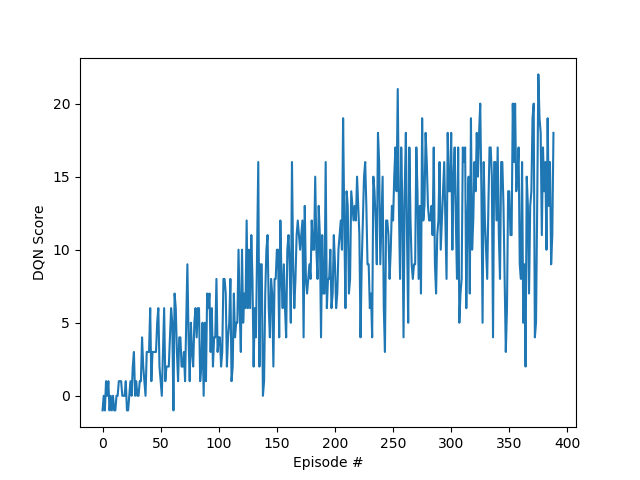

In [13]:
import matplotlib.pyplot as plt
%matplotlib notebook

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(dqn_scores)), dqn_scores)
plt.ylabel('DQN Score')
plt.xlabel('Episode #')
plt.show()

## Run Trained Agent

In [14]:
from dqn_agent import Agent
from model import *
agent = Agent(state_size,
              action_size,
              seed=0,
              device=device,
              checkpoint_filename='dqn_checkpoint.pth')
dqn(agent,n_episodes=100,train= False)

Loading Agent with weights from file 'dqn_checkpoint.pth'.
Agent is running for production.
Episode 100	Average Score: 14.97
Score: 13.0


[19.0,
 15.0,
 21.0,
 16.0,
 20.0,
 9.0,
 0.0,
 14.0,
 18.0,
 17.0,
 14.0,
 11.0,
 11.0,
 8.0,
 16.0,
 18.0,
 15.0,
 18.0,
 22.0,
 17.0,
 21.0,
 14.0,
 18.0,
 17.0,
 18.0,
 20.0,
 7.0,
 12.0,
 18.0,
 21.0,
 14.0,
 23.0,
 9.0,
 12.0,
 19.0,
 15.0,
 21.0,
 9.0,
 12.0,
 20.0,
 18.0,
 18.0,
 14.0,
 9.0,
 2.0,
 14.0,
 16.0,
 6.0,
 3.0,
 5.0,
 22.0,
 22.0,
 15.0,
 15.0,
 15.0,
 16.0,
 13.0,
 8.0,
 4.0,
 13.0,
 15.0,
 9.0,
 9.0,
 14.0,
 18.0,
 14.0,
 14.0,
 19.0,
 20.0,
 17.0,
 17.0,
 21.0,
 15.0,
 20.0,
 12.0,
 16.0,
 22.0,
 18.0,
 14.0,
 14.0,
 21.0,
 17.0,
 6.0,
 17.0,
 13.0,
 14.0,
 14.0,
 10.0,
 20.0,
 17.0,
 15.0,
 14.0,
 15.0,
 24.0,
 18.0,
 19.0,
 10.0,
 17.0,
 18.0,
 13.0]

## Close Environment

In [14]:
env.close()